In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# matplotlib toolkit
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e219291308>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

## D1: Determine the Summary Statistics for June

### Alternate Query to dataframe (shortest route)

In [5]:
# # 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# # 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
# june_temps = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").order_by(Measurement.date.desc()).all()
# print(type(june_temps))

In [6]:
# using .all() puts results in list and no conversion to list required.  Can skip #3.
# # 4. Create a DataFrame from the list of temperatures for the month of June. 
# june_tobs_df = pd.DataFrame(june_temps,columns=['June tobs'])
# june_tobs_df.head()

### Alternate Query to dataframe (for grins)

In [7]:
# # 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# # 2. Write a (SQL) query that filters the Measurement table to retrieve the temperatures for the month of June. 
# sql_data = engine.execute("SELECT measurement.tobs AS measurement_tobs\
#                       FROM measurement\
#                       WHERE measurement.date >= '2010-06-01' AND Measurement.date <= '2017-06-30'\
#                       ORDER BY measurement.date DESC")


In [8]:
# #  3. Convert the June temperatures to a list.
# june_tobs = []

# for row in sql_data:
#     june_tobs.append(row)
    
# print (june_tobs)

In [9]:
# # 4. Create a DataFrame from the list of temperatures for the month of June. 
# june_tobs_df = pd.DataFrame(june_tobs,columns=['June tobs'])
# june_tobs_df.head()

### Query (using extract) to Dataframe - Used this method for Challenge

In [10]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Using "extract", write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).order_by(Measurement.date.desc())

In [11]:
#  3. Convert the June temperatures to a list.
june_tobs = []

for row in june_temps:
    june_tobs.append(row)
    
print (june_tobs)

[(75.0,), (74.0,), (81.0,), (74.0,), (75.0,), (76.0,), (75.0,), (79.0,), (76.0,), (76.0,), (79.0,), (78.0,), (76.0,), (76.0,), (79.0,), (77.0,), (80.0,), (79.0,), (77.0,), (74.0,), (80.0,), (77.0,), (80.0,), (81.0,), (76.0,), (74.0,), (81.0,), (77.0,), (80.0,), (82.0,), (81.0,), (73.0,), (79.0,), (80.0,), (73.0,), (80.0,), (71.0,), (79.0,), (80.0,), (74.0,), (82.0,), (77.0,), (73.0,), (78.0,), (76.0,), (76.0,), (76.0,), (79.0,), (72.0,), (71.0,), (80.0,), (77.0,), (81.0,), (80.0,), (72.0,), (76.0,), (79.0,), (82.0,), (76.0,), (80.0,), (74.0,), (75.0,), (78.0,), (75.0,), (79.0,), (77.0,), (72.0,), (74.0,), (80.0,), (77.0,), (78.0,), (78.0,), (78.0,), (72.0,), (76.0,), (77.0,), (72.0,), (77.0,), (78.0,), (75.0,), (77.0,), (80.0,), (77.0,), (78.0,), (77.0,), (79.0,), (72.0,), (79.0,), (76.0,), (80.0,), (78.0,), (80.0,), (73.0,), (74.0,), (78.0,), (77.0,), (78.0,), (77.0,), (78.0,), (75.0,), (77.0,), (80.0,), (76.0,), (79.0,), (78.0,), (80.0,), (74.0,), (74.0,), (80.0,), (76.0,), (75.0,), 

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_tobs_df = pd.DataFrame(june_tobs,columns=['June Temperature'])
june_tobs_df.head()

,June Temperature
0,75.0
1,74.0
2,81.0
3,74.0
4,75.0


In [13]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_tobs_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).order_by(Measurement.date.desc())


In [15]:
# 7. Convert the December temperatures to a list.
dec_tobs = []

for row in dec_temps:
    dec_tobs.append(row)
    
print (dec_tobs)

[(66.0,), (71.0,), (72.0,), (67.0,), (65.0,), (69.0,), (69.0,), (71.0,), (68.0,), (72.0,), (69.0,), (65.0,), (73.0,), (72.0,), (73.0,), (71.0,), (77.0,), (74.0,), (69.0,), (71.0,), (71.0,), (73.0,), (71.0,), (72.0,), (72.0,), (71.0,), (74.0,), (73.0,), (74.0,), (75.0,), (71.0,), (71.0,), (74.0,), (74.0,), (74.0,), (75.0,), (72.0,), (71.0,), (74.0,), (74.0,), (78.0,), (74.0,), (69.0,), (74.0,), (73.0,), (74.0,), (78.0,), (74.0,), (69.0,), (72.0,), (69.0,), (73.0,), (68.0,), (71.0,), (71.0,), (69.0,), (71.0,), (70.0,), (72.0,), (70.0,), (73.0,), (73.0,), (68.0,), (74.0,), (72.0,), (76.0,), (73.0,), (77.0,), (74.0,), (70.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (76.0,), (73.0,), (69.0,), (69.0,), (78.0,), (71.0,), (71.0,), (76.0,), (72.0,), (73.0,), (67.0,), (74.0,), (76.0,), (69.0,), (67.0,), (71.0,), (71.0,), (75.0,), (76.0,), (70.0,), (62.0,), (63.0,), (69.0,), (66.0,), (63.0,), (75.0,), (60.0,), (66.0,), (70.0,), (75.0,), (68.0,), (74.0,), (62.0,), (64.0,), (70.0,), (70.0,), 

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_tobs_df = pd.DataFrame(dec_tobs,columns=['Dec Temperature'])
dec_tobs_df.head()

,Dec Temperature
0,66.0
1,71.0
2,72.0
3,67.0
4,65.0


In [17]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_tobs_df.describe()

,Dec Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries - Precipitation

### June Precipitation

In [18]:
# Retrieve the precipitation Data for June
june_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).order_by(Measurement.date.desc()).all()

In [19]:
# Save query results as a Pandas DataFrame.
june_prcp_df = pd.DataFrame(june_results, columns=['date','precipitation'])
june_prcp_df.head()

,date,precipitation
0,2017-06-30,0.08
1,2017-06-30,0.04
2,2017-06-30,0.00
3,2017-06-30,0.12
4,2017-06-30,0.07


In [20]:
# Calculate and print out the summary statistics for the June Precipitation DataFrame.
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [21]:
# Set the index to the date column
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)

<AxesSubplot:xlabel='date'>

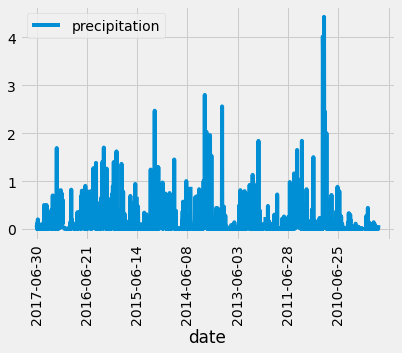

In [22]:
# Plot total precipitation per day in June.
june_prcp_df.plot(rot=90)

### December Precipitation

In [23]:
# Retrieve the precipitation Data for December
dec_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).order_by(Measurement.date.desc()).all()

In [24]:
# Save query results as a Pandas DataFrame.
dec_prcp_df = pd.DataFrame(dec_results, columns=['date','precipitation'])
dec_prcp_df.head()

,date,precipitation
0,2016-12-31,0.01
1,2016-12-31,0.62
2,2016-12-31,0.36
3,2016-12-31,0.25
4,2016-12-31,0.90


In [25]:
# Calculate and print out the summary statistics for the June Precipitation DataFrame.
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [26]:
# Set the index to the date column
dec_prcp_df.set_index(dec_prcp_df['date'], inplace=True)

<AxesSubplot:xlabel='date'>

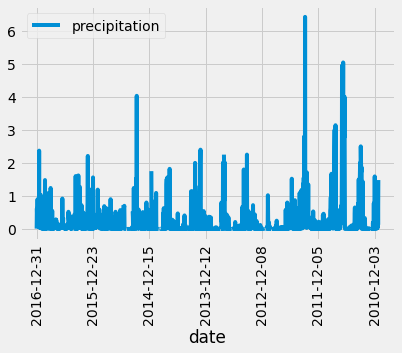

In [27]:
# Plot daily precipitation in December
dec_prcp_df.plot(rot=90)